# Machine Learning Pipeline   
### *An Implementation of Financial Distress Prediction*  

*Yeol Ye   
University of Chicago  
ziyuye@uchicago.edu*

## Phase 1: Data Preparation

In [1]:
import os
import sys
import warnings
sys.path.append('../code/')
warnings.filterwarnings('ignore')

import prep
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data_file = 'credit-data.csv'
df_file = 'df.pkl'
dict_file='Data Dictionary.xls'
cat_list = ['PersonID', 'zipcode']
target_name = 'SeriousDlqin2yrs'

prep.data_transforming(data_file, df_file, dict_file='Data Dictionary.xls')
df = prep.data_loading(df_file)

In [3]:
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,4.101600e+04,41016.000000,41016.000000,41016.000000,41016.000000,41016.000000
mean,115800.154598,0.161400,6.37587,51.683489,0.589233,331.458137,6.320623e+03,8.403477,0.419592,1.008801,0.371587,0.753681
std,28112.723511,0.367904,221.61895,14.746880,5.205628,1296.109695,1.208056e+04,5.207324,5.190382,1.153826,5.169641,1.113639
min,22.000000,0.000000,0.00000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,0.000000,0.176375,3.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,0.000000,0.866471,7.245500e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [69]:
target, features = prep.target_features_split(target_name, df)
cat, numeric = prep.num_cat_split(features, cat_list)

## Phase 2: Data Exploration

In [148]:
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

### 2.1 Check the Distribution for the Target

<IPython.core.display.Javascript object>


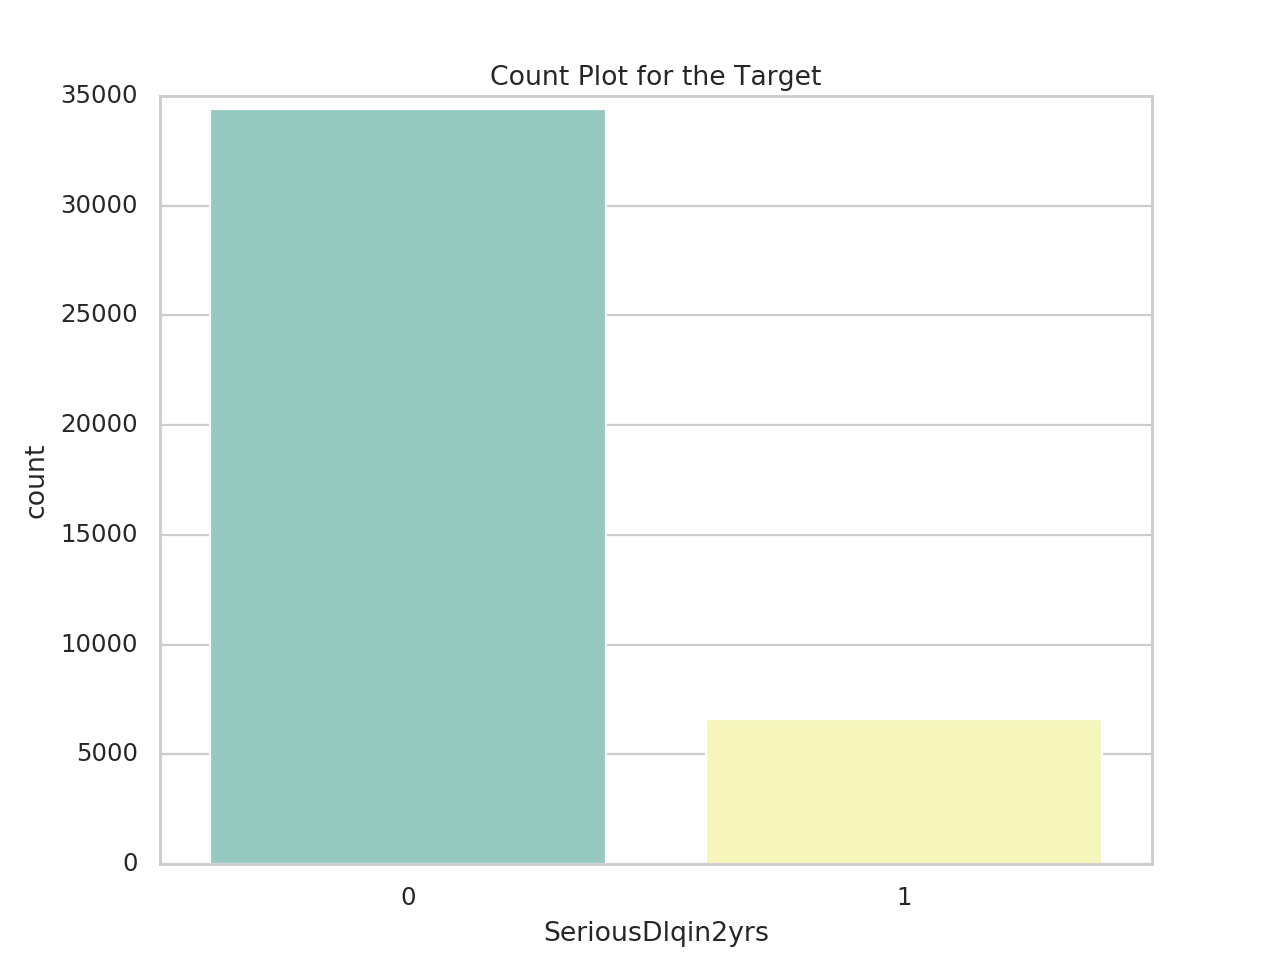

In [205]:
count_plot('SeriousDlqin2yrs', target, 'Count Plot for the Target')

### 2.2 Check the Distribution for the Categorical Column of Features

<IPython.core.display.Javascript object>


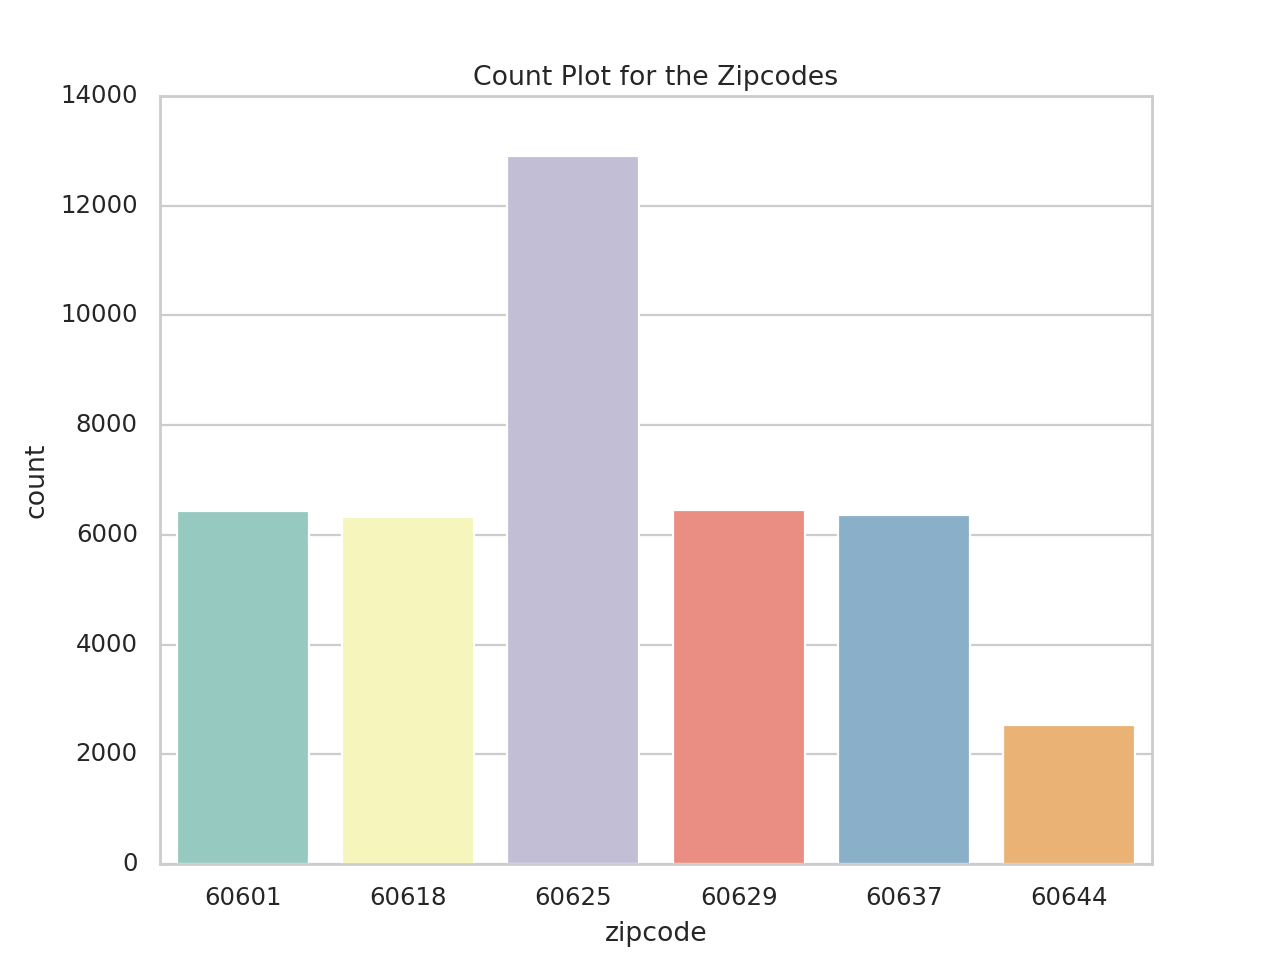

In [206]:
count_plot('zipcode', features, 'Count Plot for the Zipcodes')

### 2.3 Check the Distribution and Outliers for Numeric Data

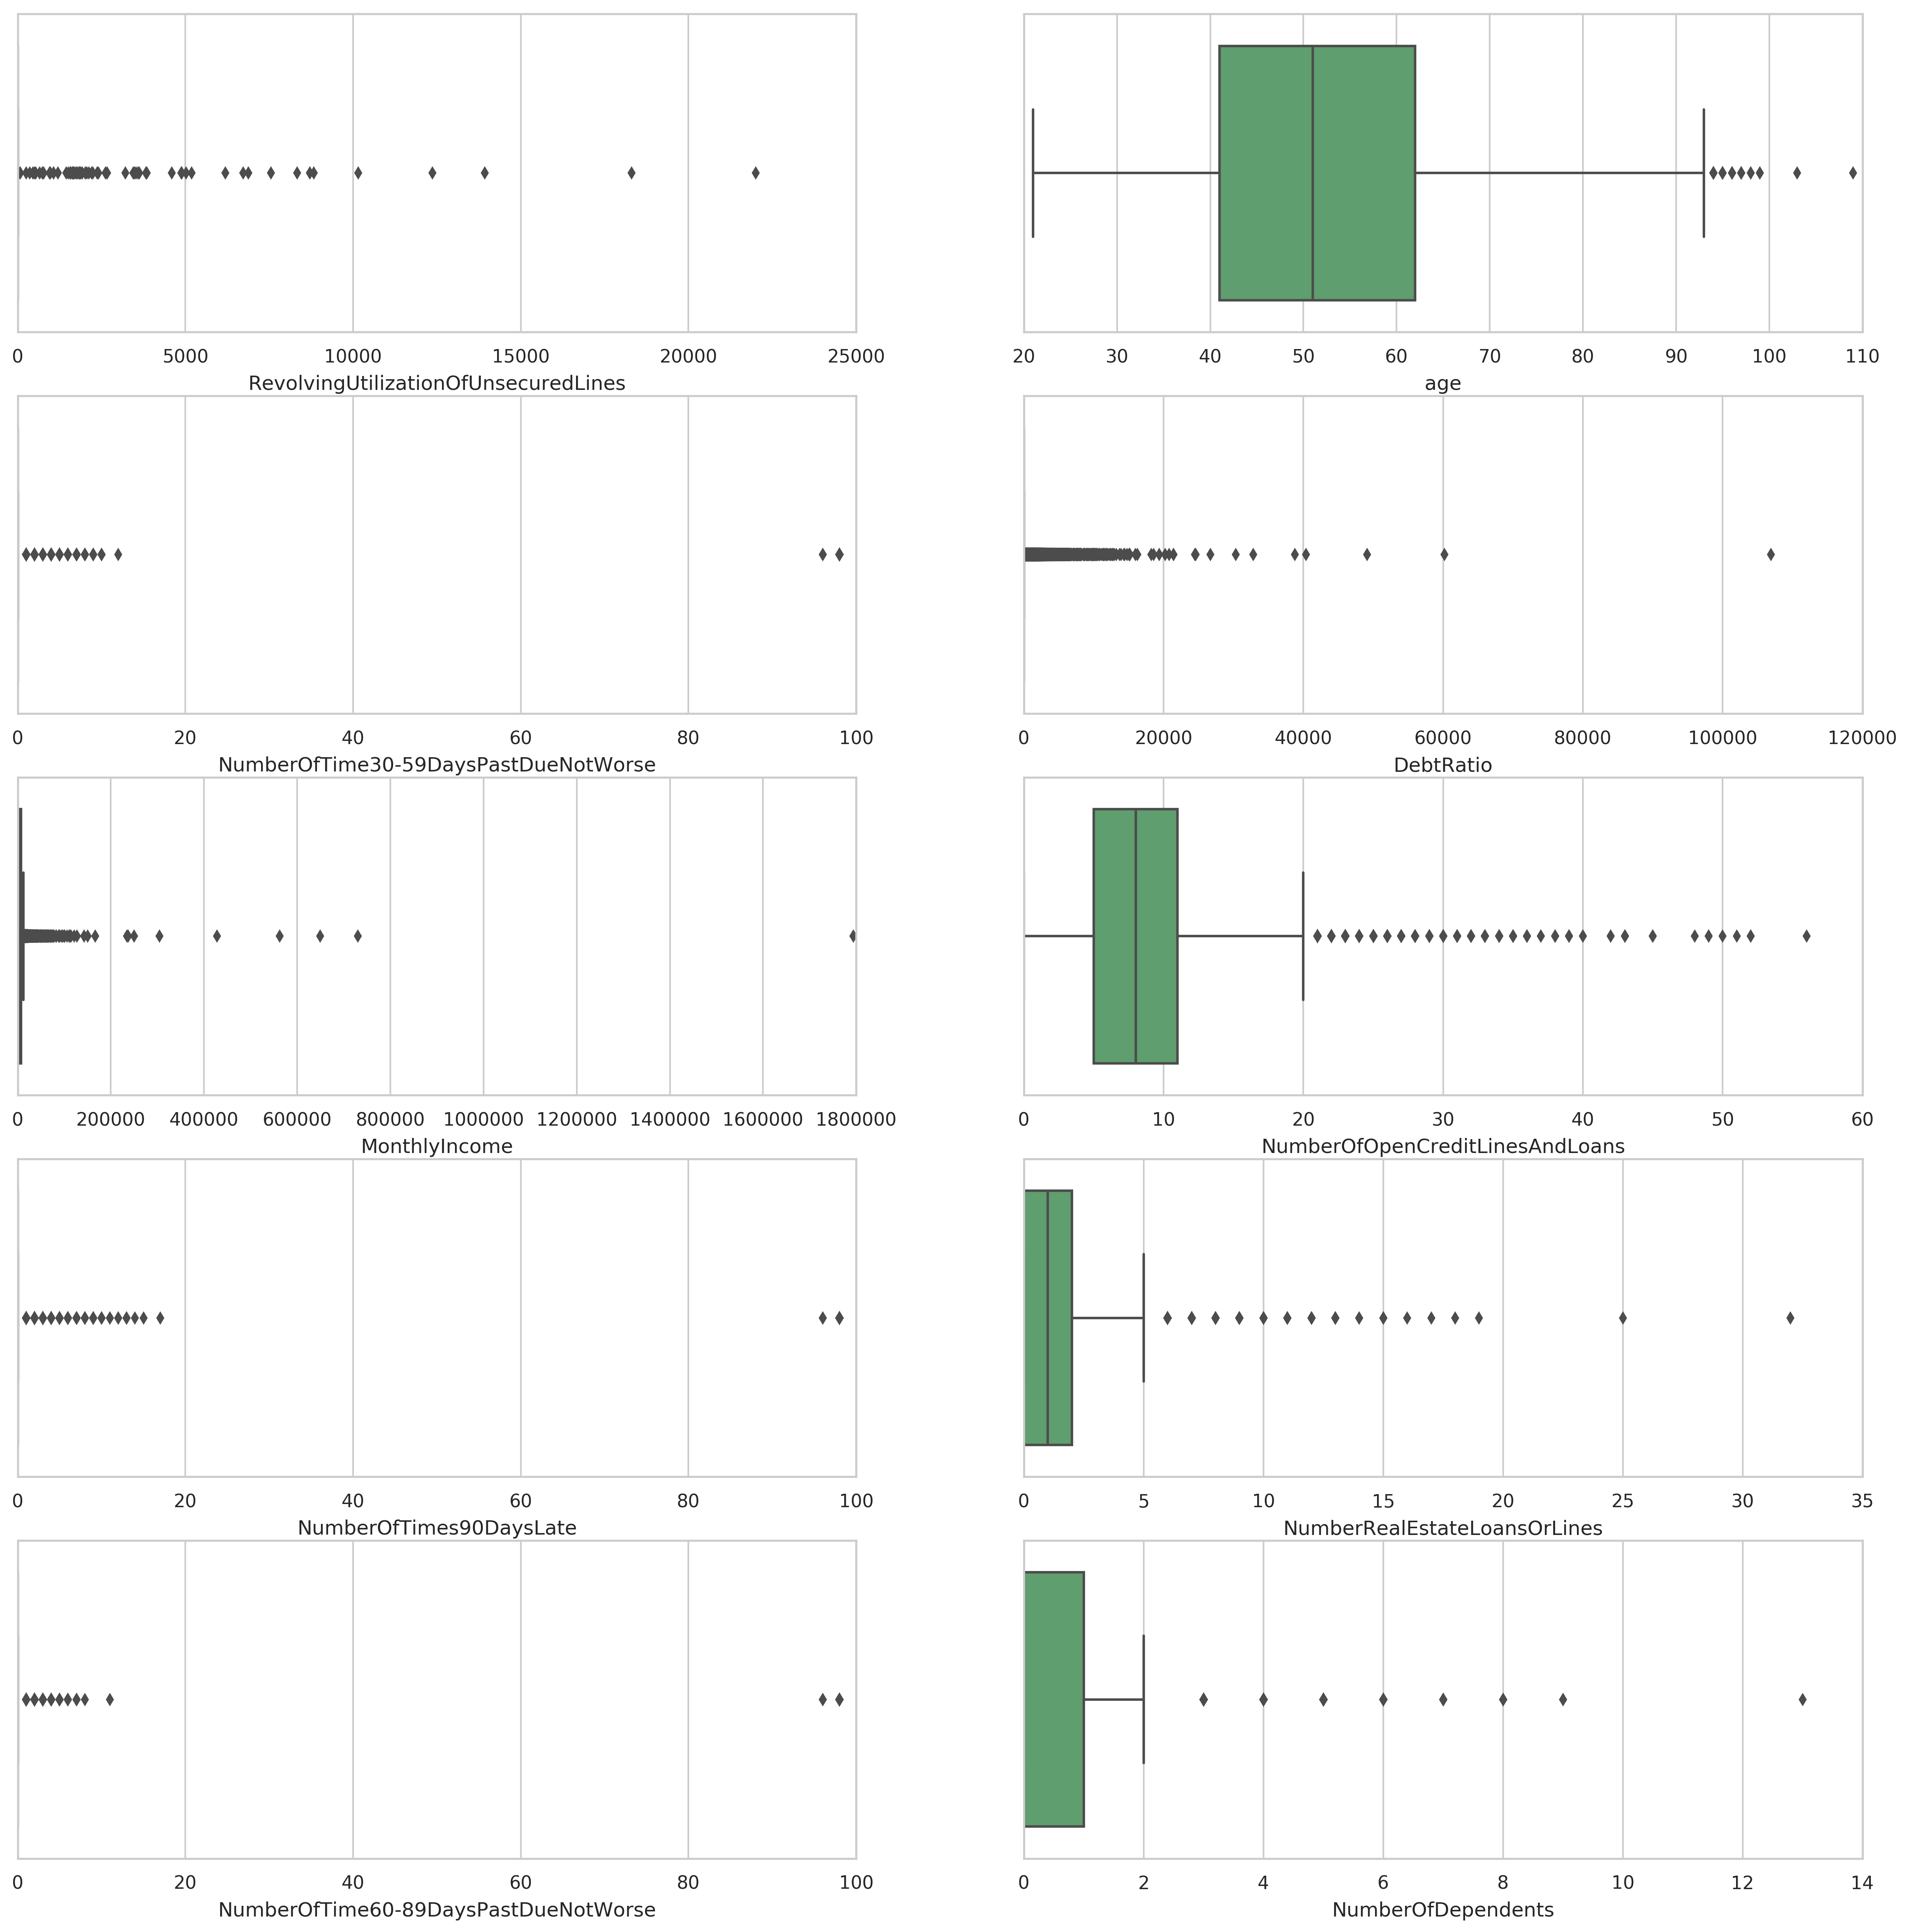

In [197]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
box_plot(numeric)

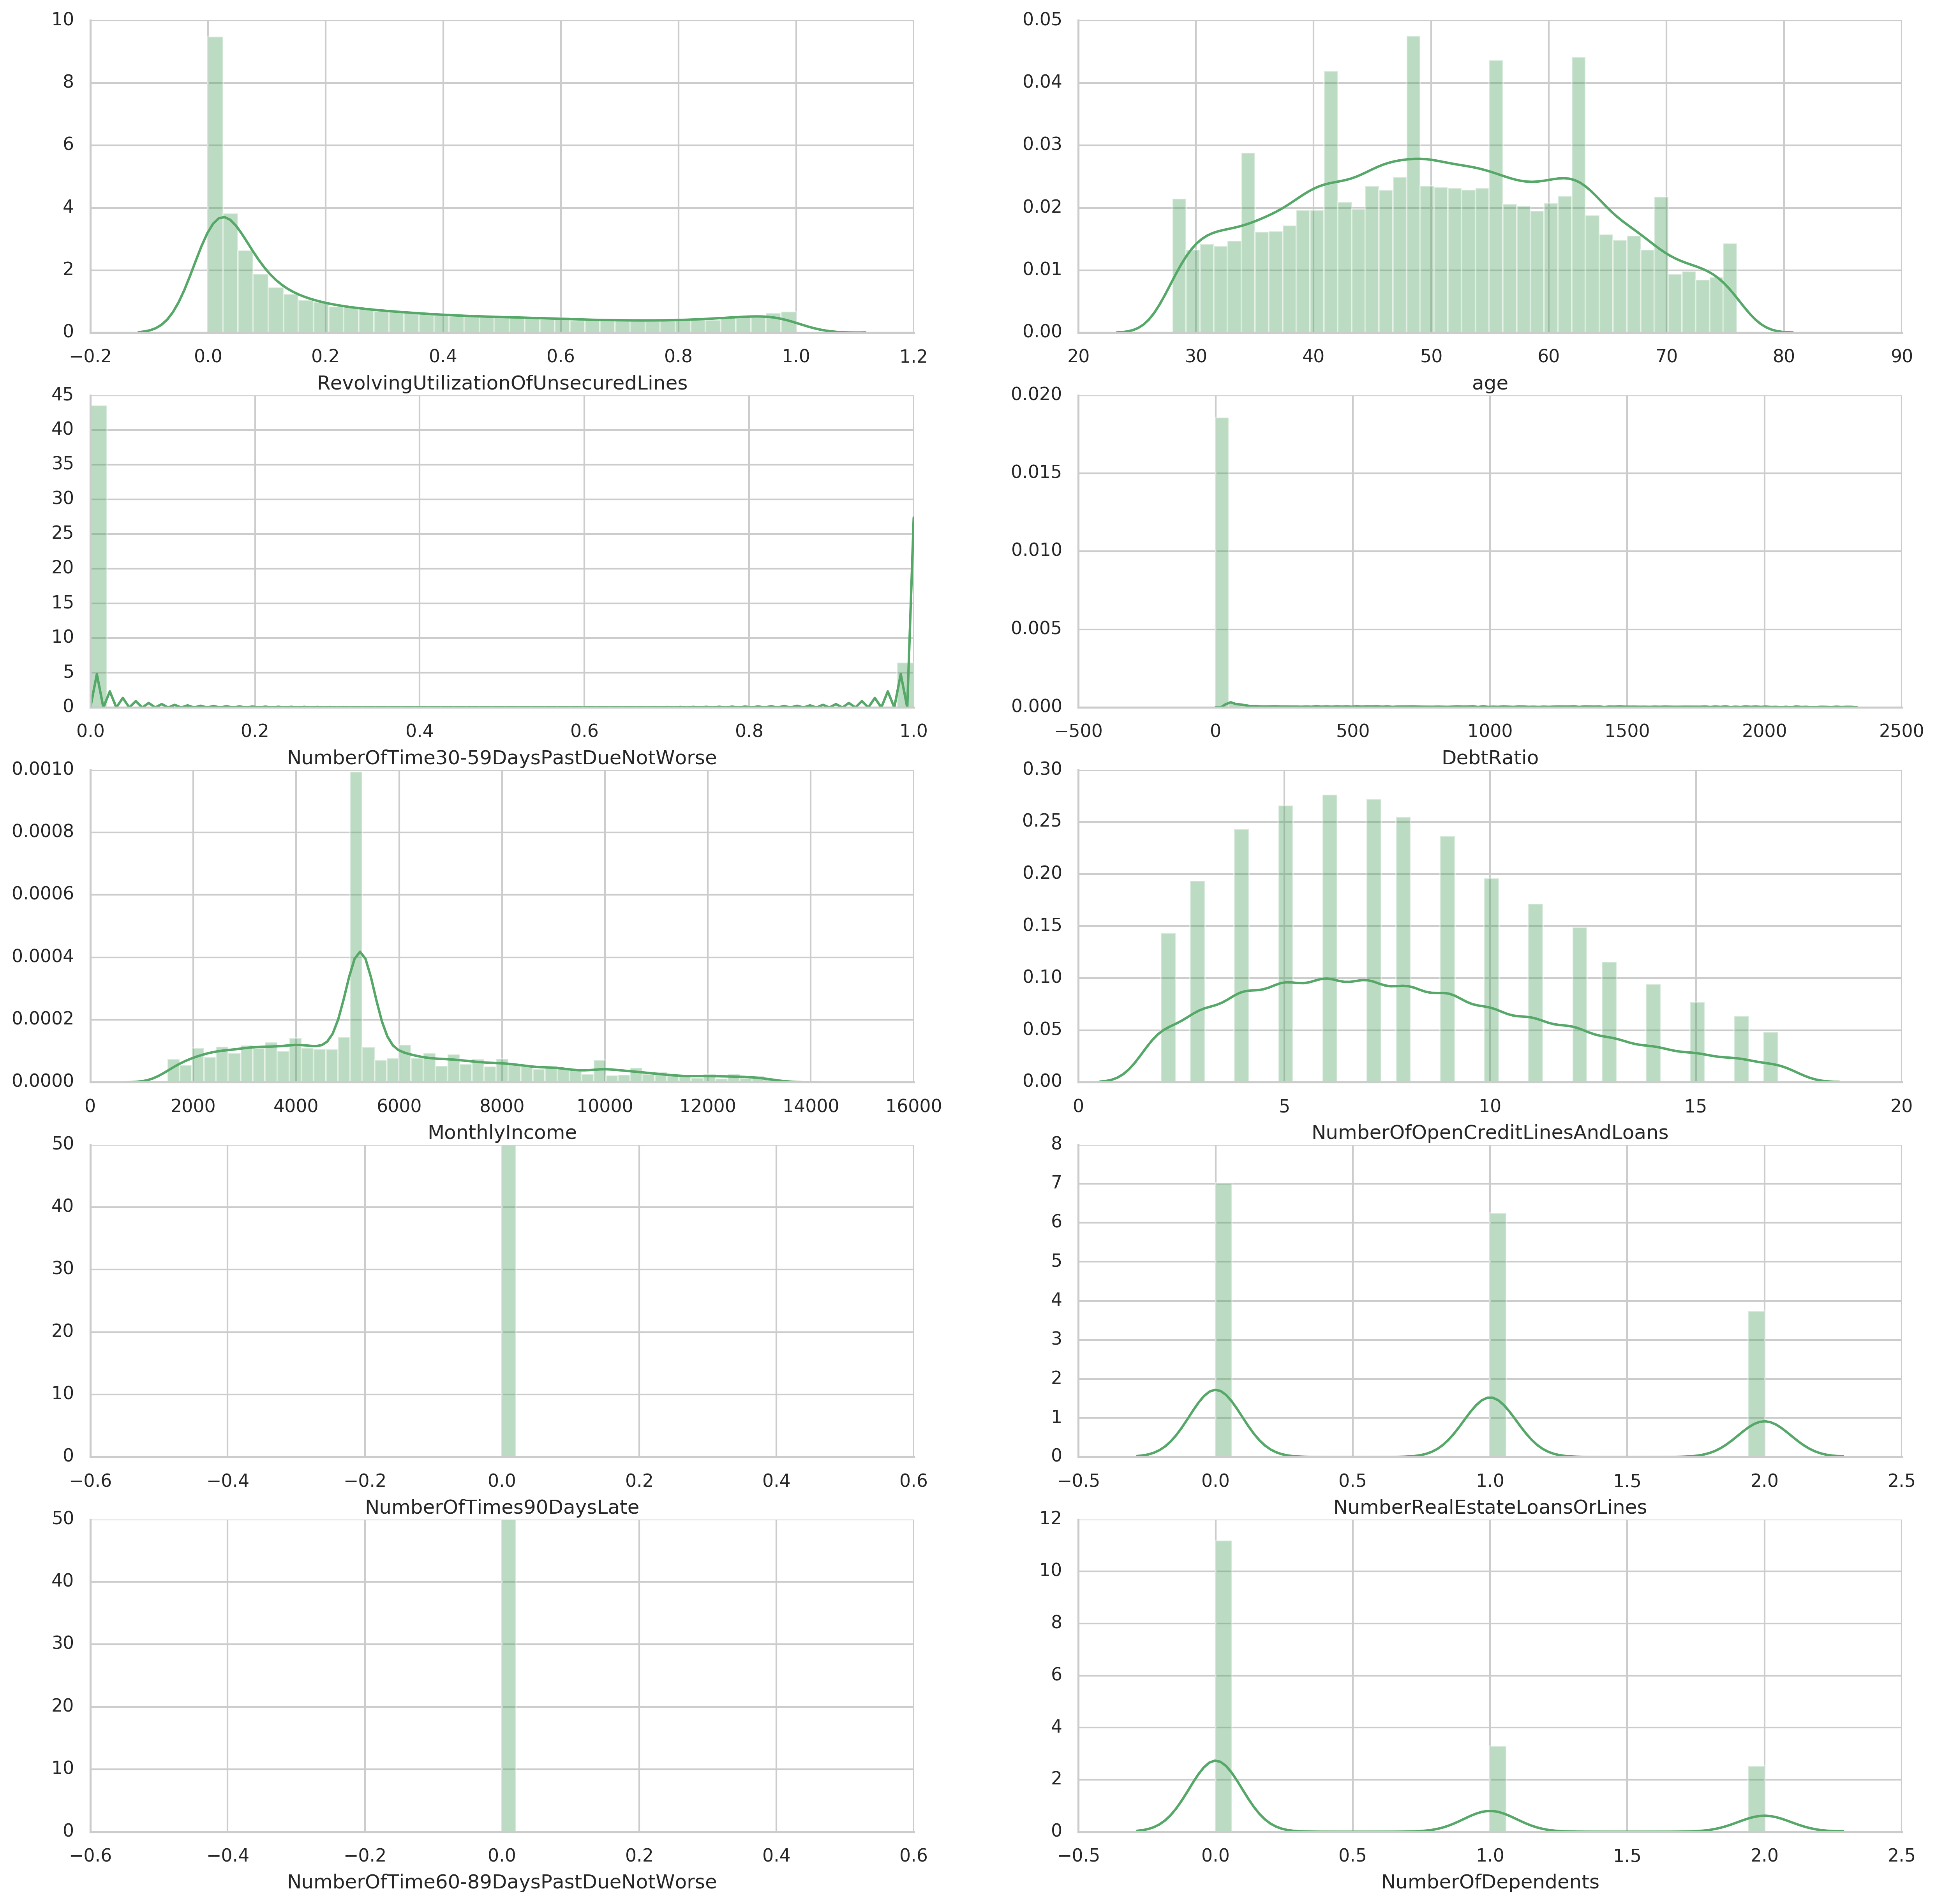

In [196]:
dist_plot(numeric)
sns.despine()

### 2.4 Check the Correlation Matrix of Numeric Columns

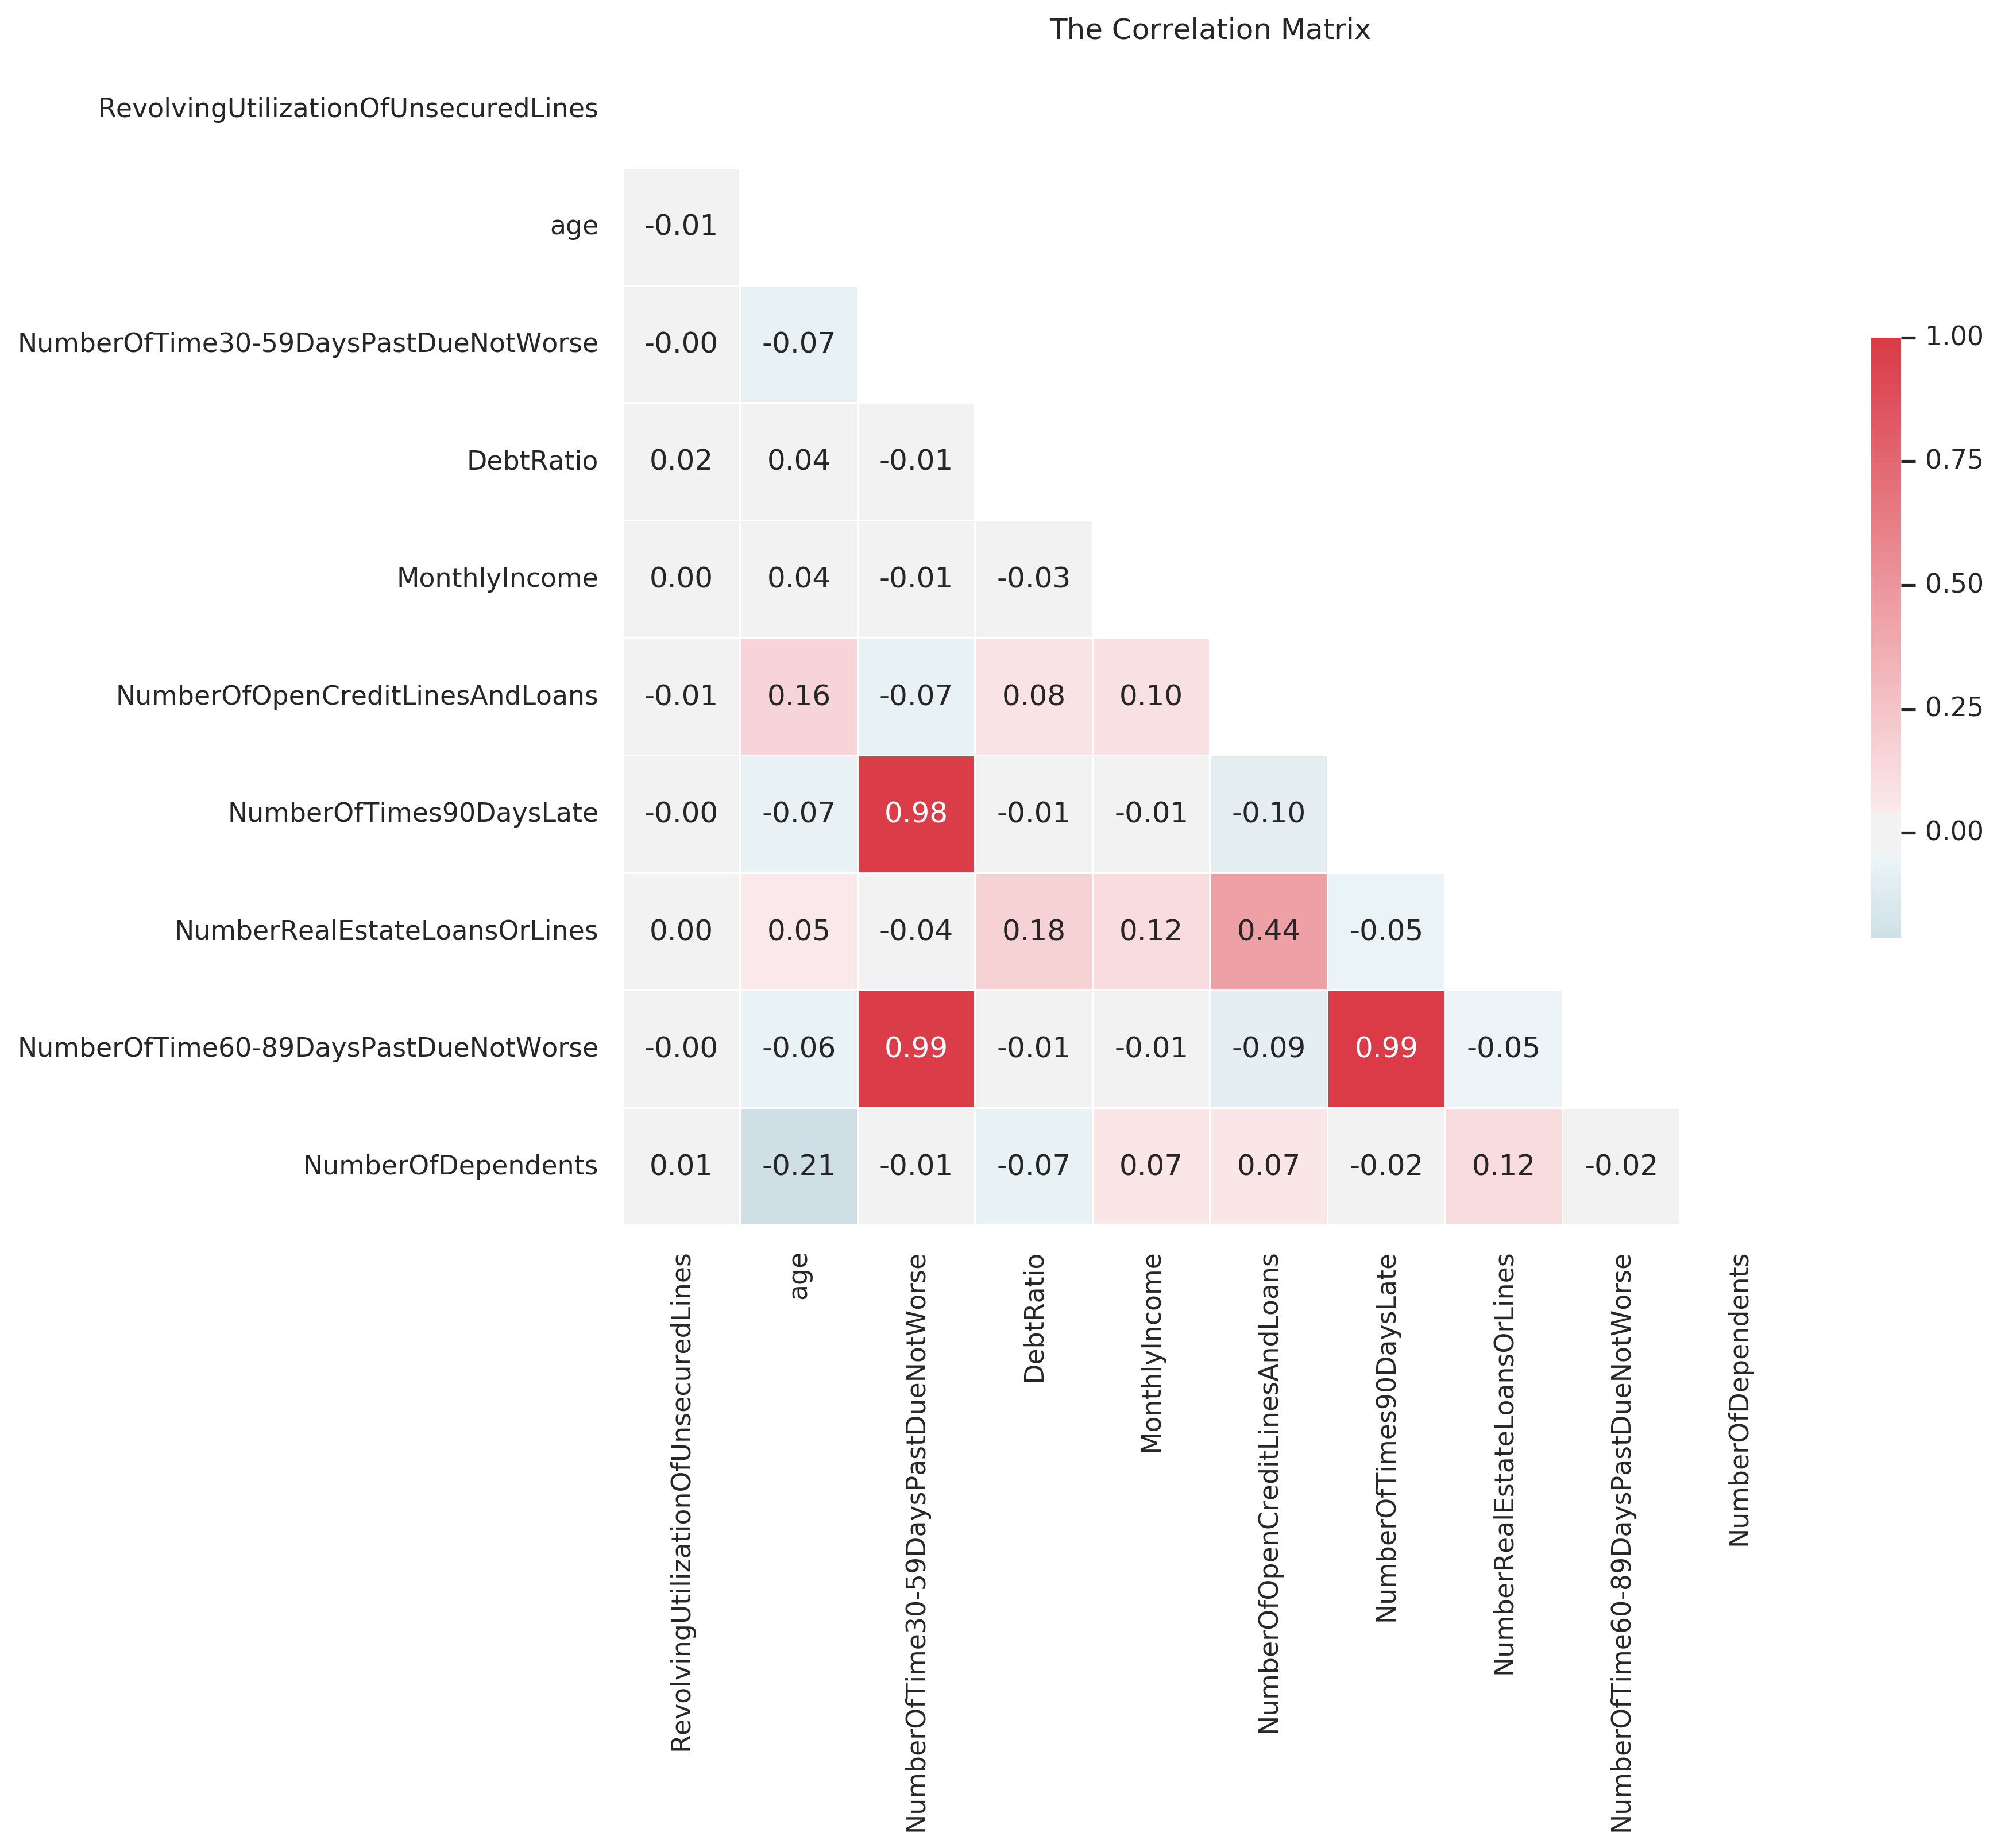

In [195]:
corr_plot(numeric)

### 2.5 Drop Some Features with High Correlations

The above correlation matrix shows that the following pairs have pretty high correlation with each other:
- `Number of Time 60-89 Days Past Due Not Worse` and `Number of Time 90 Days Late`
- `Number of Time 60-89 Days Past Due Not Worse` and `Number of Time 30-59 Days Past Due Not Worse` 
- `Number of Time 30-59 Days Past Due Not Worse` and `Number of Time 90 Days Late`  
  
In this case, we could consider drop some of these variables to make sure our data has less redundancy. We could simply drop `Number Of Time 30-59 Days Past Due Not Worse`, `Number of Time 60-89 Days Past Due Not Worse`, and retain `Number of Time 90 Days Late` in our data.

In [210]:
def drop_redundancy(data, col_names):
    """
    Drop the columns with high correlation to an existing column.
    
    Inputs:
        data: (DataFrame) the data storing feature columns
        col_names: (list) the name of columns to be dropped
    
    Returns:
        data: (DataFrame) the cleaned data
    """
    data = data.drop(col_names, axis=1)
    return data

In [213]:
col_names = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse']

In [214]:
features = drop_redundancy(features, col_names)
cat, numeric = prep.num_cat_split(features, cat_list)

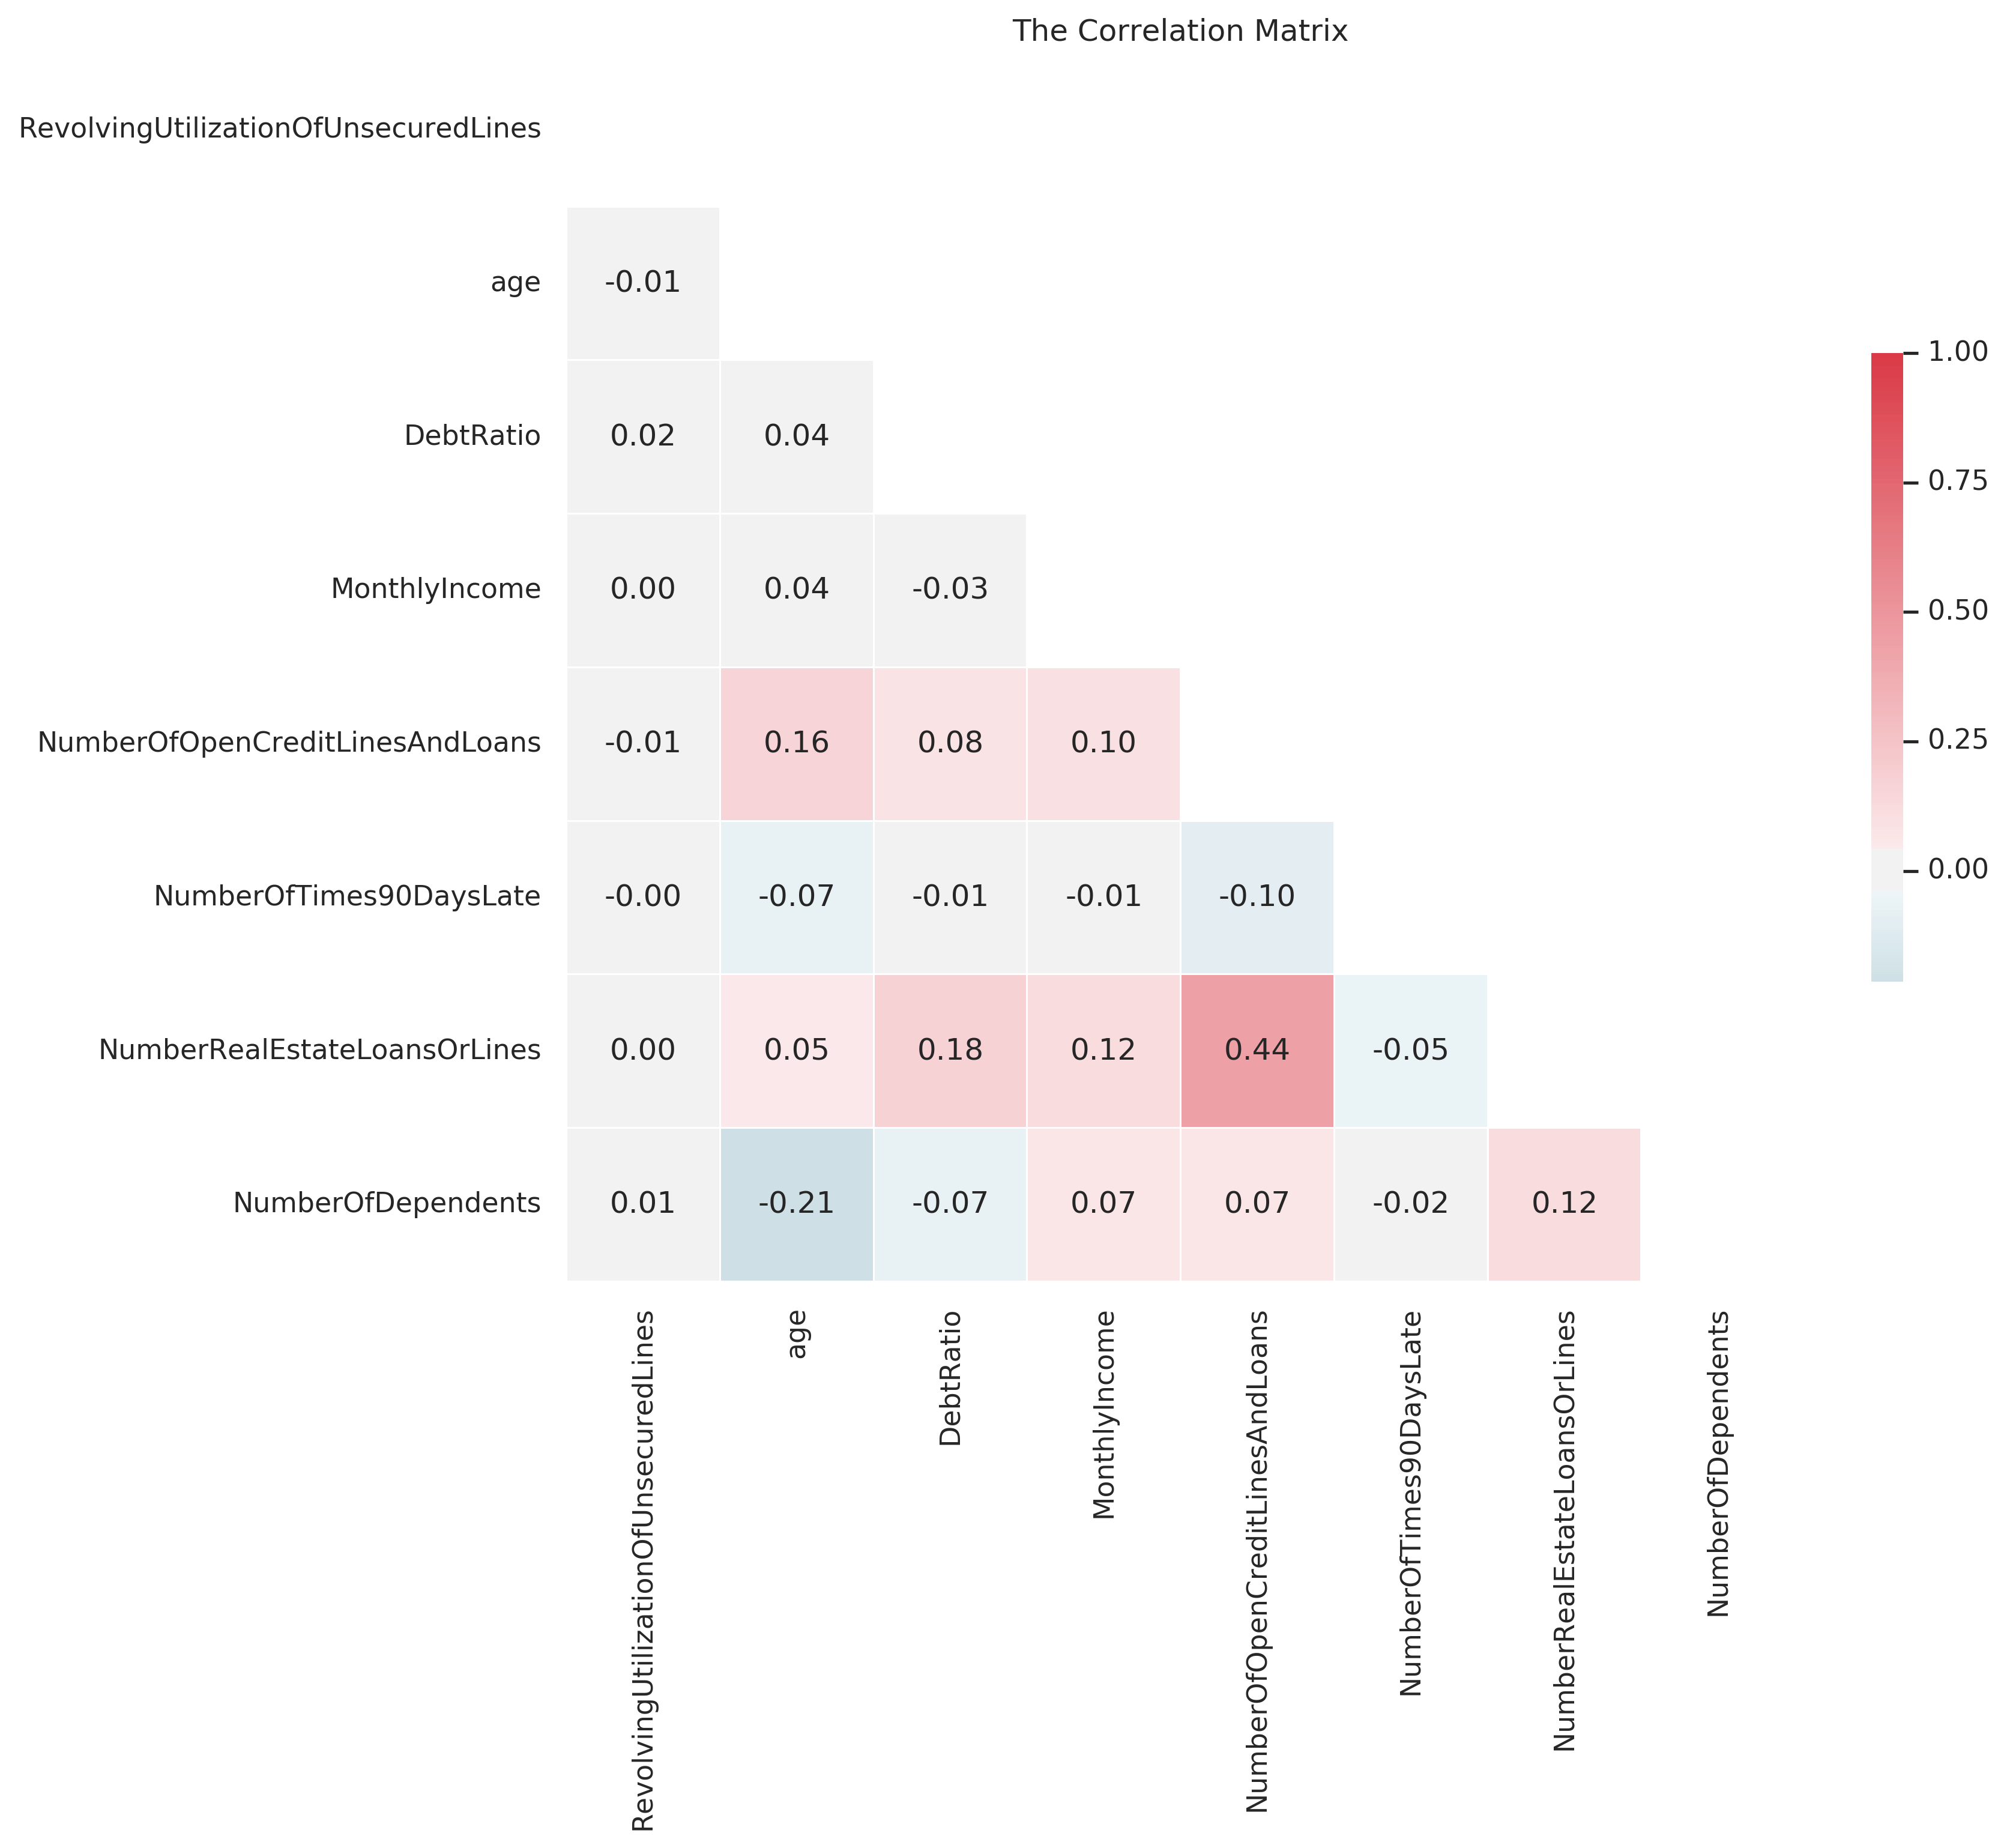

In [216]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
corr_plot(numeric)